In [29]:
import numpy as np
import h5py
import os

import matplotlib.pyplot as plt

from helpers import build_experiment_name

%matplotlib inline

In [12]:
# path where the models are
path  = '/data/lisatmp4/romerosa/itinf/models/'

In [19]:
# model info
dataset = 'camvid'

dae_dict = {'kind': 'fcn8',
            'dropout': 0.5,
            'skip': True,
            'unpool_type': 'standard',
            'n_filters': 64,
            'conv_before_pool': 1,
            'additional_pool': 0,
            'concat_h': ['pool4'],
            'noise': 0.0,
            'from_gt': False}

data_augmentation = True
training_loss = ['crossentropy']
temperature = 1.0

In [20]:
# build experiment name from model info
exp_name = build_experiment_name(dae_dict, training_loss, data_augmentation, temperature)

exp_path = os.path.join(path, dataset, exp_name)
last = 'dae_errors_last.npz'
best = 'dae_errors_best.npz'

fcn8_pool4_crossentropy_fromfcn8_z0.0_data_aug_T1.0


In [31]:
err_plot = np.load(os.path.join(exp_path, last))
err_train = err_plot['arr_0']
err_val = err_plot['arr_1']

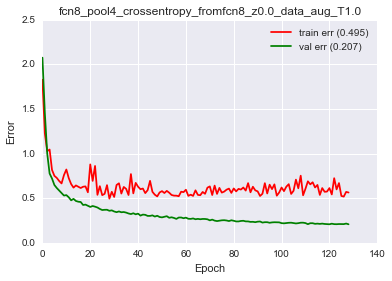

In [32]:
max_epoch = len(err_train)
epochs = range(max_epoch)

# Plot data
plt.plot(epochs, err_train, 'r', label='train err ({:.3f})'.format(np.min(err_train)))
plt.plot(epochs, err_val, 'g', label='val err ({:.3f})'.format(np.min(err_val)))

# Add legend
plt.legend()

# Add title
plt.title(exp_name)
plt.xlabel('Epoch')
plt.ylabel('Error')